In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/PySpaceCode/Global-Superstore/main/SuperStore_Sales_Dataset.csv"

df = pd.read_csv(url)

print("✅ Data Loaded:", df.shape)
print(df.columns.tolist())
df.head()

✅ Data Loaded: (5901, 23)
['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1', 'ind2']


,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


Drop unwanted columns

In [ ]:
df=df.drop(columns=['ROW ID', 'Postal Code'], errors='ignore')

Handle missing values

In [ ]:
df=df.dropna(subset=['Order Date', 'Sales'])

Convert types

In [ ]:
df['Order Date']= pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df= df.dropna(subset=['Order Date'])
df['Sales']= df['Sales'].astype(float)
df['Quantity']= df['Quantity'].astype(int)
df['Profit']=df['Profit'].astype(float)

Feature Engineering

In [ ]:
df['Month']=df['Order Date'].dt.month_name()
df['Year']=df['Order Date'].dt.year
df['ProfitMargin']=df['Profit']/df['Sales']

Save cleaned file

In [ ]:
df.to_csv('Cleaned_Superstore.csv', index=False)

Total sales per category

In [ ]:
category_sales=df.groupby('Category')['Sales'].sum().reset_index()

Monthly revenue trend

In [ ]:
monthly_revenue=df.groupby('Month')['Sales'].sum().reset_index()

Top 5 products by sales

In [ ]:
top_products= df.groupby('Product Name')['Sales'].sum().nlargest(5).reset_index()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Line chart indicating monthly revenue trend

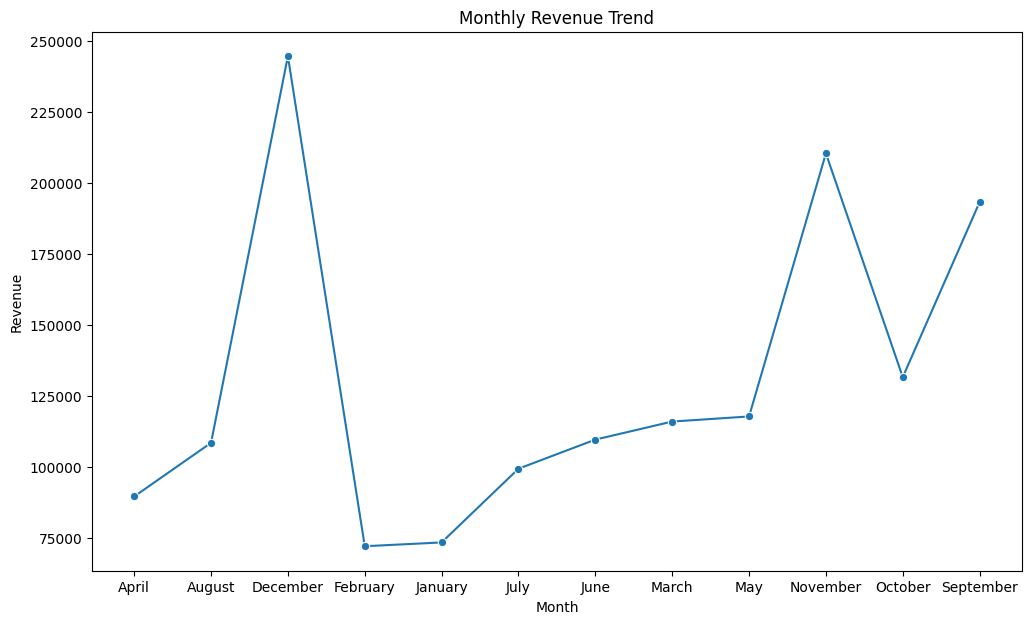

In [29]:
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_revenue, x='Month', y='Sales', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [30]:
import sqlite3

In [31]:
conn=sqlite3.connect("superstore.db")
df.to_sql("superstore_cleaned", conn, if_exists="replace", index=False)
conn.close()
print("✔️ Cleaned data saved to SQLite Database.")

✔️ Cleaned data saved to SQLite Database.
